In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

medic = pd.read_csv('medical.csv')
medic.info()
medic.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [99]:
medic.isnull().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [100]:
medic.describe() #기초통계량 확인

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


<Axes: xlabel='Age'>

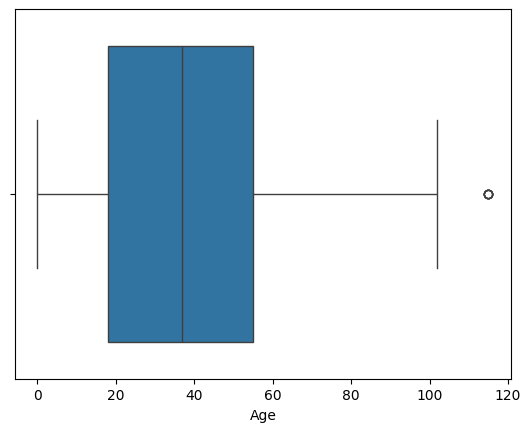

In [101]:
medic = medic[medic['Age'] >= 0 ]
sns.boxplot(x=medic.Age)

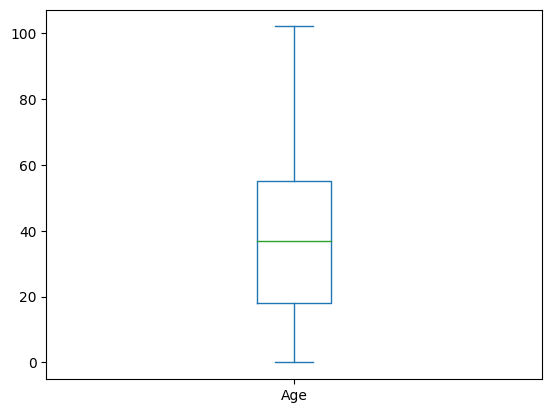

In [102]:

medic = medic[medic['Age'] <= 110 ]
medic['Age'].plot(kind = 'box')
no_show=medic[medic['No-show']==1]
show=medic[medic['No-show']==0]

In [133]:
medic['No-show'][medic['No-show'] == 'No'] = 0
medic['No-show'][medic['No-show'] == 'Yes'] = 1
medic['No-show'].value_counts()
medic['ScheduledDay'] = pd.to_datetime(medic['ScheduledDay'])
medic['AppointmentDay'] = pd.to_datetime(medic['AppointmentDay'])

medic.info()
medic['No-show'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 110454 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110454 non-null  float64            
 1   AppointmentID   110454 non-null  int64              
 2   Gender          110454 non-null  object             
 3   ScheduledDay    110454 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110454 non-null  datetime64[ns, UTC]
 5   Age             110454 non-null  int64              
 6   Neighbourhood   110454 non-null  object             
 7   SMS_received    110454 non-null  int64              
 8   No-show         110454 non-null  object             
 9   waiting_day     110454 non-null  int32              
dtypes: datetime64[ns, UTC](2), float64(1), int32(1), int64(3), object(3)
memory usage: 12.9+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_13156\1610639509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medic['No-show'][medic['No-show'] == 'Yes'] = 1


No-show
0    88162
1    22292
Name: count, dtype: int64

In [104]:

medic['waiting_day'] = medic['AppointmentDay'].dt.dayofyear - medic['ScheduledDay'].dt.dayofyear

medic = medic[medic['waiting_day'] >=0]

data = medic[['waiting_day', 'No-show']]

data


,waiting_day,No-show
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
110522,35,0
110523,35,0
110524,41,0
110525,41,0


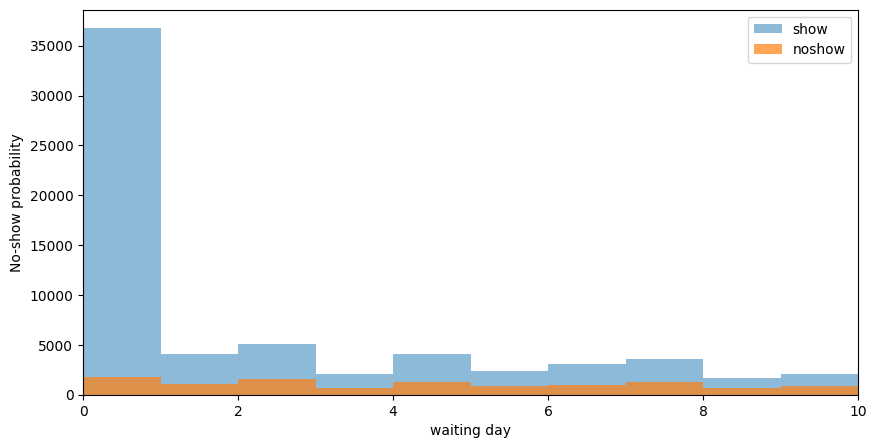

In [105]:
plt.figure(figsize=(10,5))
plt.hist(data[(data['No-show']==0) & (data['waiting_day'] <= 10)]['waiting_day'],alpha = 0.5,label='show')
plt.hist(data[(data['No-show']==1) & (data['waiting_day'] <= 10)]['waiting_day'],alpha = 0.7,label='noshow')
plt.xlim(0,10)
plt.xlabel('waiting day')
plt.ylabel('No-show probability')
plt.legend()
plt.show()

In [106]:
no_show[no_show['waiting_day']<=10]['waiting_day'].hist(alpha=0.7,label='no_show')
show[show['waiting_day']<=10]['waiting_day'].hist(alpha=0.3,label='show')
plt.legend()


KeyError: 'waiting_day'

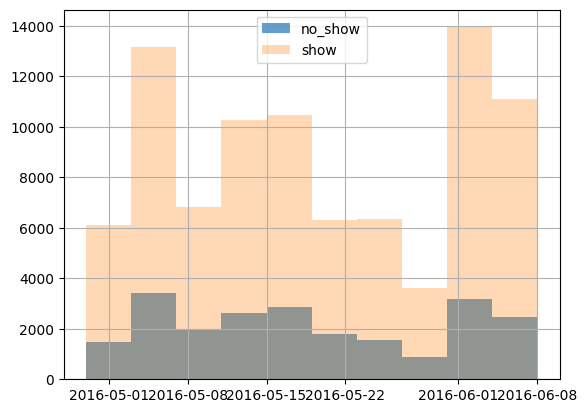

In [ ]:
no_show['AppointmentDay'].hist(alpha=0.7,label='no_show')
show['AppointmentDay'].hist(alpha=0.3,label='show')
plt.legend()

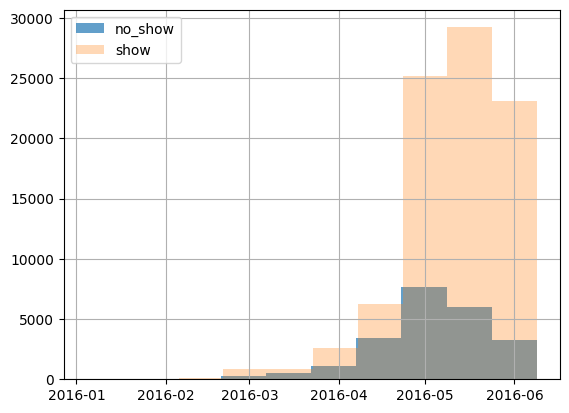

In [ ]:
no_show['ScheduledDay'].hist(alpha=0.7,label='no_show')
show['ScheduledDay'].hist(alpha=0.3,label='show')
plt.legend()

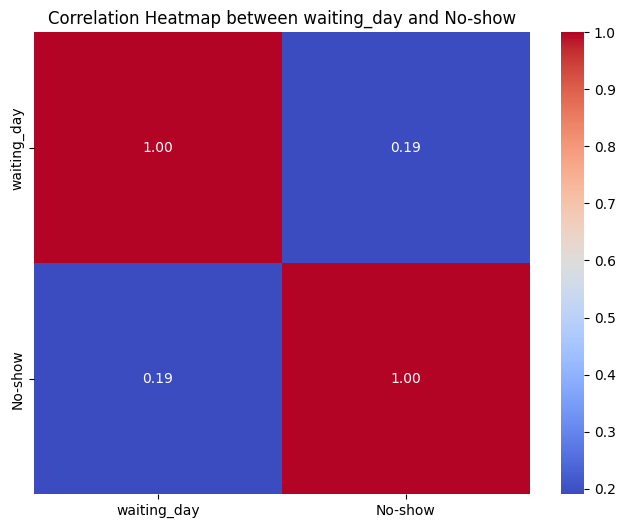

In [ ]:
heatmap_data = data[['waiting_day', 'No-show']]
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between waiting_day and No-show')
plt.show()

In [ ]:
import numpy as np
data1 = data.groupby('waiting_day').mean()[data['No-show']==1]
data1['No-show'][data1['No-show']==0] = np.nan
data1 = data1['No-show'].fillna(method='pad')
data1

C:\Users\user\AppData\Local\Temp\ipykernel_13156\990211648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data.groupby('waiting_day').mean()[data['No-show']==1]


waiting_day
6      0.247956
7      0.266816
11     0.316109
17     0.316170
20     0.343724
21     0.308974
22     0.344416
31     0.327381
44     0.299363
48     0.290598
49     0.347222
50     0.269231
51     0.362637
52     0.255556
56     0.251232
61     0.229630
76     0.307692
79     0.391304
90     0.241379
104    0.750000
107    0.750000
123    0.750000
126    1.000000
132    1.000000
Name: No-show, dtype: float64

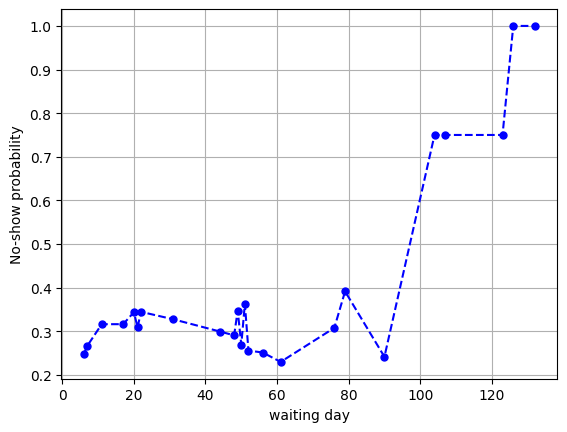

In [ ]:
plt.plot(data1,color='b',linestyle = '--',marker = 'o',markersize= '5')
plt.xlabel('waiting day')
plt.ylabel('No-show probability')
plt.grid()
plt.show()

<Axes: >

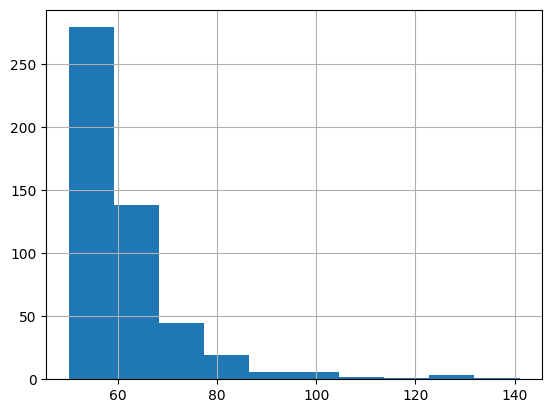

In [ ]:
medic['PatientId'].value_counts().iloc[0:10] #재방문 환자 상위 10명 추출
medic['PatientId'].value_counts().iloc[0:500].hist()

In [112]:
temp = medic[['waiting_day','SMS_received','No-show']].corr()

<Axes: >

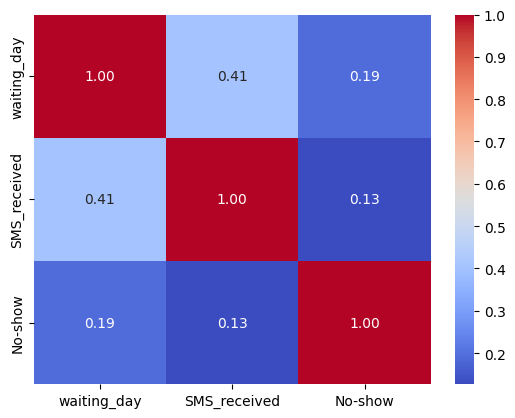

In [113]:
sns.heatmap(temp, annot=True, cmap='coolwarm', fmt='.2f')


<Axes: xlabel='No-show', ylabel='count'>

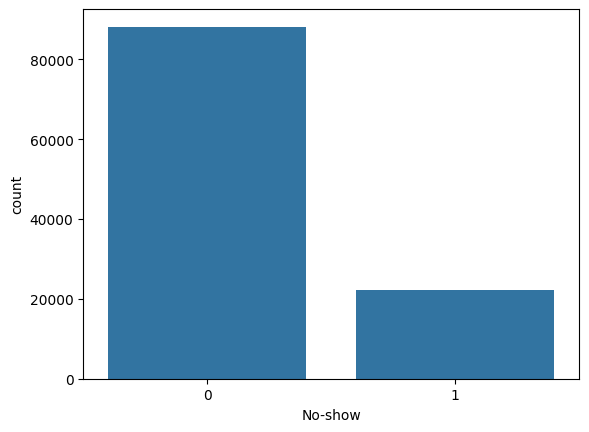

In [121]:
sns.countplot(x='No-show',data = medic)


<Axes: xlabel='Gender', ylabel='count'>

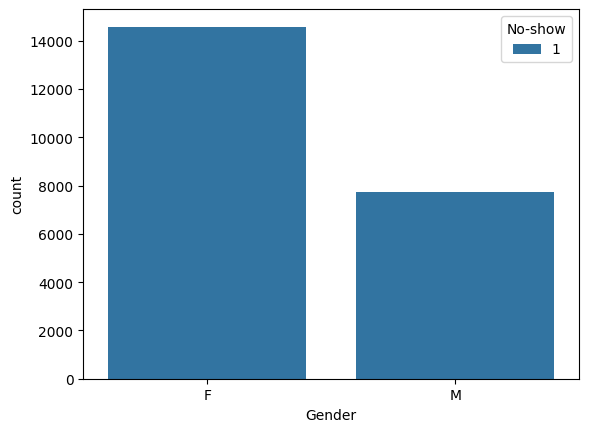

In [132]:
data1 = medic[['Gender','No-show']]
sns.countplot(x= 'Gender',hue = data1['No-show'][data1['No-show'] == 1],data = data1)




In [142]:
type(medic[(medic['Gender']=='F')]['Gender'].value_counts().sum())


numpy.int64

In [136]:
medic[(medic['Gender']=='M')]['Gender'].value_counts()

Gender
M    38668
Name: count, dtype: int64

In [137]:
medic[(medic['Gender']=='F') & (medic['No-show']==1)]['Gender'].value_counts()

Gender
F    14577
Name: count, dtype: int64

In [138]:
medic[(medic['Gender']=='M') & (medic['No-show']==1)]['Gender'].value_counts()

Gender
M    7715
Name: count, dtype: int64

In [139]:
man = 7715 / 38668 * 100
woman = 14577 / 71786 * 100
print(f'남자의 노쇼비율{man}% 여자의 노쇼비율{woman}%')

남자의 노쇼비율19.951898210406537% 여자의 노쇼비율20.306187836068315%
